# Part 3 .- Price Elasticity and Cross-Price Elasticity of Demand 

## 3.2 Cross-Price Elasticity Matrix

Cross-price elasticity's main purpose is to analyze how sensible is our price against their main competitors. For instance, does our product impression demand increase, if our direct competitor Y increases their prices on the same or similar electronic products within a certain timeframe? 

- Cross-Price Elasticity Formula

    **Quantity percentage change/ Competitor Price percentage change * Competitor Price Mean/ Quantity Mean**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('price_clean.csv', encoding = "ISO-8859-1")

In [3]:
df_best = df[df['merchant']=='Bestbuy.com']

### 3.1.1 Sample Selection

For the price elasticity model, we take the following sample: 
<t>
Bestbuy main category is **laptop, computer** with **9.5% (1,071)** of total impression count

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
category = df_best['Category_name'].value_counts()
print("Bestbuy Category Percentage\n{}\n{}\n Bestbuy Category values count\n{}\n{}".format(
      50*"-", (category / len(df_best.index))[:5] * 100, 50*"-", category[:5]))

Bestbuy Category Percentage
--------------------------------------------------
laptop, computer                9.488792
speaker, portable, bluetooth    6.715691
car, speaker, subwoofer         4.899442
receiver, amplifier, home       4.429875
car, receiver, dash             3.641357
Name: Category_name, dtype: float64
 Bestbuy Category values count
--------------------------------------------------
laptop, computer                1071
speaker, portable, bluetooth     758
car, speaker, subwoofer          553
receiver, amplifier, home        500
car, receiver, dash              411
Name: Category_name, dtype: int64


In [6]:
df_laptop = df_best[df_best['Category_name']=='laptop, computer']

###  3.1.2 Sample Imputation

Following data preprocessing selected is for the 2017 year, on a weekly basis.
- Mean price and number of impression count per week
- NaN value manipulation, this model implements the fillna method = 'ffill' by filling the nan values with the last reference cell value. 

In [7]:
#impressions per month
test1 = df_laptop.groupby(['name', 'Week_Number']).agg({'disc_price': 'mean' ,'Date_imp': 'count' }).reset_index()

In [8]:
x_pivot = test1.pivot(index='Week_Number', columns='name' ,values='disc_price')

In [9]:
x_values = pd.DataFrame(x_pivot.to_records())
x_values.fillna(method='ffill', inplace=True)
x_values[:2]

,Week_Number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,236.495,...,799.99,499.99,NaN,664.99,379.99,316.99,NaN,807.49,NaN,617.49


In [10]:
y_pivot = test1.pivot(index='Week_Number', columns='name', values='Date_imp')
y_values = pd.DataFrame(y_pivot.to_records())
y_values.fillna(method='ffill', inplace=True)
y_values[:2]

,Week_Number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,4.0,NaN,3.0,6.0,NaN,2.0,4.0,...,1.0,2.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,2.0


In [15]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =False, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['ranking'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)
    
    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['ranking'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})
        
    
    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['ranking'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
            
    
    #Adjust Ranking column and print dataframe
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    df = df.iloc[:,:3]
    df.set_index('ranking', inplace=True)
    display(df)

In [17]:
#Cross price elasticity function

def crossprice_(df_x, df_y, column_name):
    import statsmodels.api as sm
    
    #grab all X_values
    new_df = df_x.copy()
    #grab y_value with same column name
    new_df['y_value-' + column_name] = df_y[column_name]
    
    multi_xvalues = new_df.loc[:, new_df.columns[1:-1]]
    multi_yvalue = new_df.loc[:, new_df.columns[-1]]
    
    #get price mean values per product
    mean_xvalues = np.mean(multi_xvalues)
    #get mean quantity for y value
    mean_yvalue = np.mean(multi_yvalue)
    
    # Multilinear regression
    X = sm.add_constant(multi_xvalues)
    model = sm.OLS(multi_yvalue, X, missing='drop')
    result = model.fit()
    
    #get results
    results_summary = result.summary()
    #get pvalues of each coefficient
    pvalue = result.pvalues
    
    #transform summary result to a table
    results_as_html = results_summary.tables[1].as_html()
    new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]
    
    #add p value to the table
    new_dataframe['p_value']= pvalue
    
    #set product name as index
    new_dataframe.index.name = 'name'
    new_dataframe.reset_index()
    
    #get each product name price mean
    new_dataframe['mean'] = mean_xvalues
    # execute cross-price formula
    new_dataframe['price_elasticity'] = (new_dataframe.coef) * (new_dataframe['mean'] / mean_yvalue)

    new_dataframe = new_dataframe.reset_index()
    pvalue_significant = new_dataframe['p_value']
    
    #Chech null hypothesis for coefficient or slope value per product
    new_dataframe[column_name+'_CPE'] = np.where((pvalue_significant > .05), 'No effect', new_dataframe['price_elasticity'])
    new_dataframe = new_dataframe.dropna()
    
    return new_dataframe[['name', column_name + '_CPE']]


In [18]:
#append cross-price elasticity into a matrix for analysis
result_df = pd.DataFrame()
for column in x_values.columns[1:]:
    result_df[['name', column + '_CPE']] = crossprice_(x_values, y_values, column)
    result_df = result_df.dropna()
    result_df[column+'_CPE'] = pd.to_numeric(result_df[column+'_CPE'], errors='coerce').fillna(0)

In [19]:
result_df = result_df.set_index('name')

In [20]:
result_df.head()

,"12 MacBook (Mid 2017, Gold)_CPE","12 MacBook (Mid 2017, Silver)_CPE",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus_CPE,"13.3 MacBook Air (Mid 2017, Silver)_CPE","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)_CPE","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)_CPE",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X_CPE,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""_CPE",Acer 15.6 Chromebook CB5-571-C4G4_CPE,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""_CPE",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""_CPE","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""_CPE","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""_CPE","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""_CPE","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1_CPE","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""_CPE","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""_CPE","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""_CPE","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""_CPE","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black""_CPE"
name,,,,,,,,,,,,,,,,,,,,,
"12 MacBook (Mid 2017, Gold)",-4.266917,-1.904690,-0.000684,-0.000697,0.041909,0.307334,-0.000697,-0.000811,-0.000545,-1.994301,...,-1.994301,-0.000742,-0.000712,-0.000697,-0.000671,-0.000581,-1.957483,-0.000671,-3.912072,-2.065526
"12 MacBook (Mid 2017, Silver)",-10.606051,0.500366,-0.000385,-0.000392,0.034864,0.511337,-0.000392,-0.000456,-0.000307,1.216628,...,1.327231,-0.000417,-0.000401,-0.000392,-0.000377,-0.000327,1.302728,-0.000377,-0.751019,1.317356
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,-0.162390,0.158330,0.002599,0.002651,-0.022064,-0.139738,0.002651,0.003083,0.002072,0.104993,...,0.034998,0.002820,0.002707,0.002651,0.002549,0.002209,0.034352,0.002549,0.059411,0.054372
"13.3 MacBook Air (Mid 2017, Silver)",-0.409262,0.675283,0.008963,0.009142,-0.025664,0.239535,0.009142,0.010631,0.007144,0.488509,...,0.407091,0.009726,0.009337,0.009142,0.008791,0.007619,0.399576,0.008791,0.460708,0.421630
"15.4 MacBook Pro with Touch Bar (Late 2016, Silver)",1.074186,-0.483384,0.121514,0.123944,-0.067361,-0.718519,0.123944,0.144122,0.103590,0.051971,...,-0.213697,0.131856,0.126582,0.123944,0.119177,0.103287,-0.209752,0.119177,0.483686,-0.331994


## Cross-Price Elasticity of Ad Impression Demand Matrix

In [21]:
test_largest = result_df.nlargest(3,result_df.columns[1])[[result_df.columns[1]]]
test_smallest = result_df.nsmallest(3,result_df.columns[1])[[result_df.columns[1]]]
frames = [test_smallest, test_largest]

result = pd.concat(frames).reset_index()

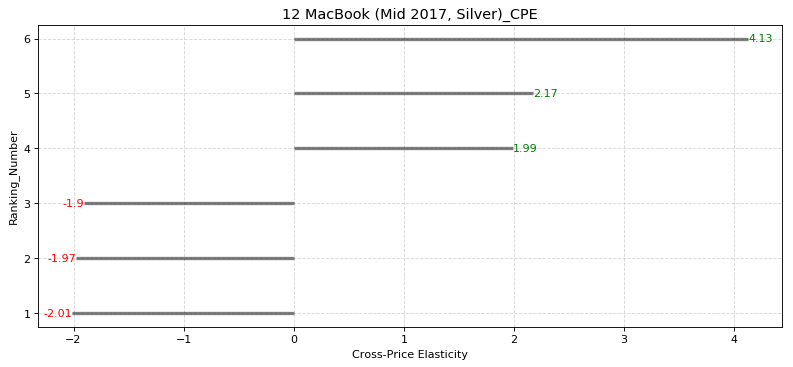

,name,"12 MacBook (Mid 2017, Silver)_CPE"
ranking,,
6,Apple MacBook Pro with Touch Bar - 13.3 - Core...,4.128415
5,Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...,2.172169
4,Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...,1.987359
3,"12 MacBook (Mid 2017, Gold)",-1.904690
2,Apple - MacBook Pro¨ - 13 Display - Intel Core...,-1.973667
1,Details About Openbox Excellent: Asus Rog Gl50...,-2.013038


In [22]:
CPE_MacBook = divergent_plot(result ,result.columns[1], 'Ranking_Number', 'Cross-Price Elasticity' )

In [23]:
for column in result_df.columns[1:]:
    test_largest = result_df.nlargest(3, column)[[column]]
    test_smallest = result_df.nsmallest(3, column)[[column]]
    frames = [test_smallest, test_largest]

result = pd.concat(frames).reset_index()